# Lab03

# Exercise

In the tutorial, we learned how to train a word2vec skip-gram model in pytorch, and we manually updates the parameters (weights) in it. 

In this Lab 03 exercise, please use the "NN Model" and the "Optimiser" (that we learned in the above sections) to train a word2vec skip-gram model.

Note: The embedding size should 2. The code for the preprocessing and the hyperparameter setup are provided. Have fun!




In [0]:
#preprocess and hyperparameters

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# raw data - setences 
sentences = ["he likes cat",
             "he likes dog",
             "he likes animal",
             "dog cat animal",
             "she likes cat",
             "she dislikes dog",
             "cat likes fish",
             "cat likes milk",
             "dog likes bone",
             "dog dislikes fish",
             "dog likes milk",
             "she likes movie",
             "she likes music",
             "he likes game",
             "he likes movie",
             "cat dislikes dog"]

# convert all sentences to unique word list
word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))

# make dictionary so that we can be reference each index of unique word
word_dict = {w: i for i, w in enumerate(word_list)}

# Making window size 1 skip-gram
# i.e.) he likes cat
#   -> (he, [likes]), (likes,[he, cat]), (cat,[likes])
#   -> (he, likes), (likes, he), (likes, cat), (cat, likes)
skip_grams = []

for i in range(1, len(word_sequence) - 1):
    # (context, target) : ([target index - 1, target index + 1], target)
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    # skipgrams - (target, context[0]), (target, context[1])..
    for w in context:
        skip_grams.append([target, w])


# prepare random batch from skip-gram - we do not have enought data so we randomly select data
def prepare_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        input_temp = [0]*voc_size
        input_temp[data[i][0]] = 1
        random_inputs.append(input_temp)  # target
        random_labels.append(data[i][1])  # context word

    return np.array(random_inputs), np.array(random_labels)

#hyperparameters
voc_size = len(word_list)
learning_rate = 0.1
batch_size = 10
embedding_size = 2

In [0]:
# You should submit "ipynb" file (You can download it from "File" > "Download .ipynb") to Canvas
# Please include the required libraries

import torch
import torch.nn as nn
import torch.optim as optim

class SkipGram(nn.Module):
    def __init__(self):
        super(SkipGram, self).__init__()
        #You need to use "bias=False" when you define Linear functions
        #***************put your code here***************
        self.linear1 = nn.Linear(voc_size, embedding_size,bias=False)
        self.linear2 = nn.Linear(embedding_size, voc_size,bias=False)

    def forward(self, x):
        hidden = self.linear1(x)
        out = self.linear2(hidden)
        return out

skip_gram_model = SkipGram()
criterion = nn.CrossEntropyLoss() #please note we are using "CrossEntropyLoss" here
optimiser = optim.SGD(skip_gram_model.parameters(), lr=learning_rate)

for epoch in range(5000):

    inputs,labels = prepare_batch(skip_grams, batch_size)
    inputs_torch = torch.from_numpy(inputs).float()
    labels_torch = torch.from_numpy(labels)

    #***************put your code here***************

    skip_gram_model.train()
    # zero the parameter gradients
    optimiser.zero_grad()

    # forward + backward + optimize
    outputs = skip_gram_model(inputs_torch)
    loss = criterion(outputs, labels_torch) # We don't need to calcualte logsoftmax here
    loss.backward()
    optimiser.step()

    if epoch % 500 == 499: 
        print('Epoch: %d, loss: %.4f' %(epoch + 1, loss))

#Hint: you can refer lab1 to know how to get the weight from a Model Linear layer
weight1 = skip_gram_model.linear1.weight.data
trained_embeddings = weight1.detach().T.numpy()
      

Epoch: 500, loss: 2.4979
Epoch: 1000, loss: 2.0442
Epoch: 1500, loss: 2.2392
Epoch: 2000, loss: 1.8411
Epoch: 2500, loss: 2.3674
Epoch: 3000, loss: 1.6145
Epoch: 3500, loss: 2.3483
Epoch: 4000, loss: 1.9302
Epoch: 4500, loss: 1.9033
Epoch: 5000, loss: 1.7700


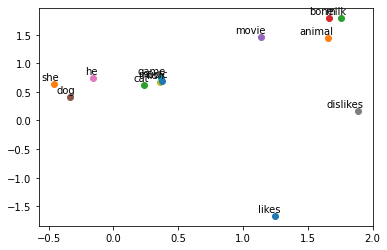

In [0]:
### Visualise result
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    # print (label, " : ", x, " " , y)
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()